In [2]:
# Importing the libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data

df_train = pd.read_csv('D:/Backend/training/data/train_motion_data.csv')
df_test = pd.read_csv('D:/Backend/training/data/test_motion_data.csv')

# Data Analysis

### Train & Test Data Size

In [115]:
df_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [116]:
df_test

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924
...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,SLOW,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,SLOW,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,SLOW,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,SLOW,820708


In [8]:
df_train.shape

(3644, 8)

In [9]:
df_test.shape

(3084, 8)

In [120]:
new_merge = pd.concat([df_test, df_train], ignore_index=True)
new_merge

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924
...,...,...,...,...,...,...,...,...
6723,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
6724,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
6725,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
6726,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


### Splitting the Train & Test Data Based on their Classes

In [4]:
# Split the samples by class 
df_train_normal = df_train.loc[df_train['Class'] == 'NORMAL']
df_train_slow = df_train.loc[df_train['Class'] == 'SLOW']
df_train_aggressive = df_train.loc[df_train['Class'] == 'AGGRESSIVE']

df_test_normal = df_test.loc[df_test['Class'] == 'NORMAL']
df_test_slow = df_test.loc[df_test['Class'] == 'SLOW']
df_test_aggressive = df_test.loc[df_test['Class'] == 'AGGRESSIVE']

### Train & Test Sample Size Based on Class

In [11]:
# Check train data per label
train_slow_samples = df_train_slow.__len__()
train_normal_samples = df_train_normal.__len__()
train_aggressive_samples = df_train_aggressive.__len__()

test_slow_samples = df_test_slow.__len__()
test_normal_samples = df_test_normal.__len__()
test_aggressive_samples = df_test_aggressive.__len__()

print('---Slow Samples---')
print('Train: ' + str(train_slow_samples))
print('Test: ' + str(test_slow_samples))

print('---Normal Samples---')
print('Train: ' + str(train_normal_samples))
print('Test: ' + str(test_normal_samples))

print('---Aggressive Samples---')
print('Train: ' + str(train_aggressive_samples))
print('Test: ' + str(test_aggressive_samples))

---Slow Samples---
Train: 1331
Test: 1273
---Normal Samples---
Train: 1200
Test: 997
---Aggressive Samples---
Train: 1113
Test: 814


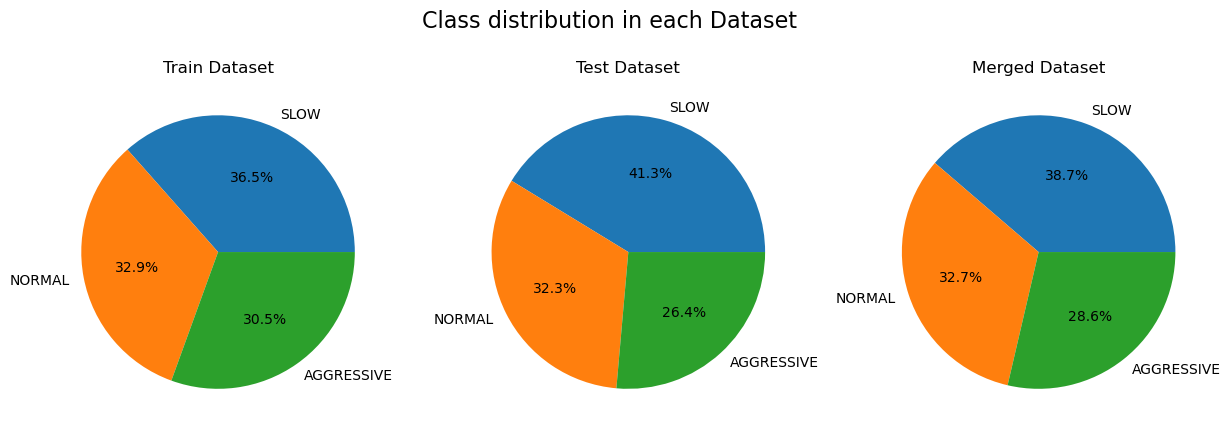

In [141]:
import matplotlib.pyplot as plt

# define figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot pie chart for df_train
axs[0].set_title("Train Dataset")
counts = df_train['Class'].value_counts()
axs[0].pie(counts, labels=counts.index, autopct="%1.1f%%")

# plot pie chart for df_test
axs[1].set_title("Test Dataset")
counts = df_test['Class'].value_counts()
axs[1].pie(counts, labels=counts.index, autopct="%1.1f%%")

# plot pie chart for new_merge
axs[2].set_title("Merged Dataset")
counts = new_merge['Class'].value_counts()
axs[2].pie(counts, labels=counts.index, autopct="%1.1f%%")

fig.suptitle('Class distribution in each Dataset', fontsize=16)

# show the plot
plt.show()


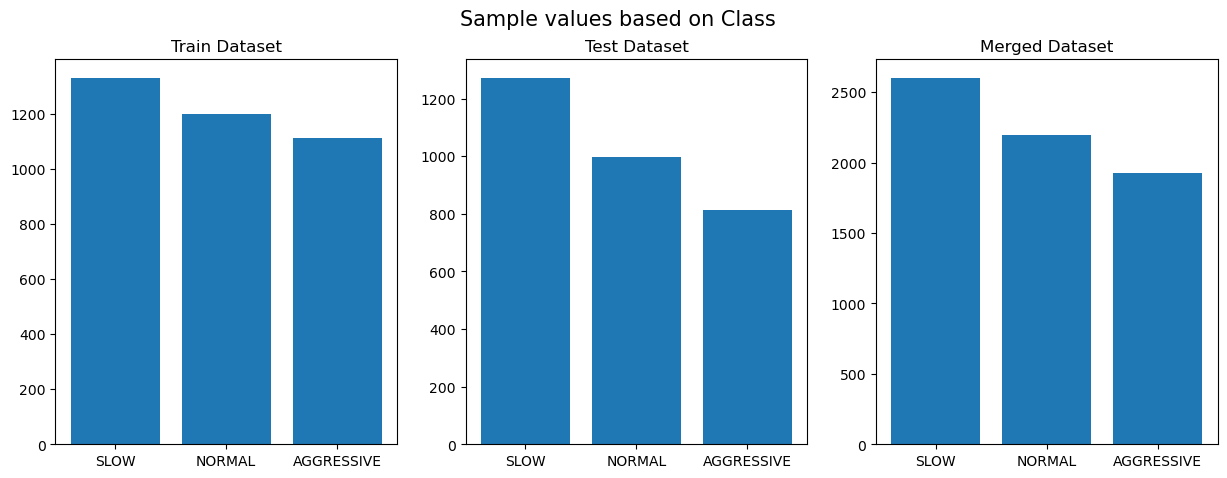

In [169]:
import matplotlib.pyplot as plt

# define figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot pie chart for df_train
axs[0].set_title("Train Dataset")
counts = df_train['Class'].value_counts()
axs[0].bar(counts.index, counts.values)

# plot pie chart for df_test
axs[1].set_title("Test Dataset")
counts = df_test['Class'].value_counts()
axs[1].bar(counts.index, counts.values)

# plot pie chart for new_merge
axs[2].set_title("Merged Dataset")
counts = new_merge['Class'].value_counts()
axs[2].bar(counts.index, counts.values)

fig.suptitle('Sample values based on Class', fontsize=15)

# show the plot
plt.show()


### Comparing Sensor Values of Train & Test DataSets

**TRAIN**

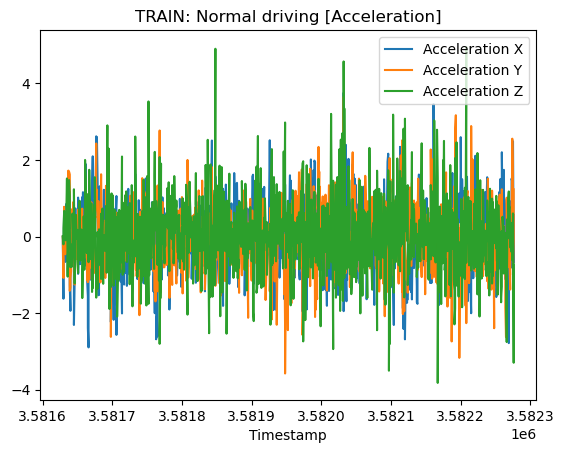

In [12]:
# Normal driving behavior's acceleration
import matplotlib.pyplot as plt

plt.plot(df_train_normal['Timestamp'], df_train_normal['AccX'], label='Acceleration X')
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccY'], label='Acceleration Y')
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccZ'], label='Acceleration Z')

plt.title('TRAIN: Normal driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

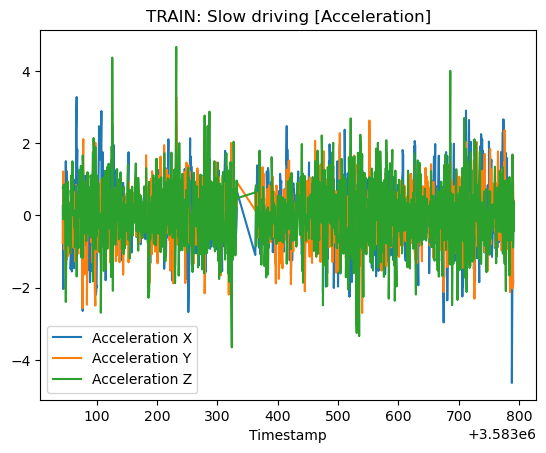

In [13]:
# Slow driving behavior's acceleration
import matplotlib.pyplot as plt

plt.plot(df_train_slow['Timestamp'], df_train_slow['AccX'], label='Acceleration X')
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccY'], label='Acceleration Y')
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccZ'], label='Acceleration Z')

plt.title('TRAIN: Slow driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

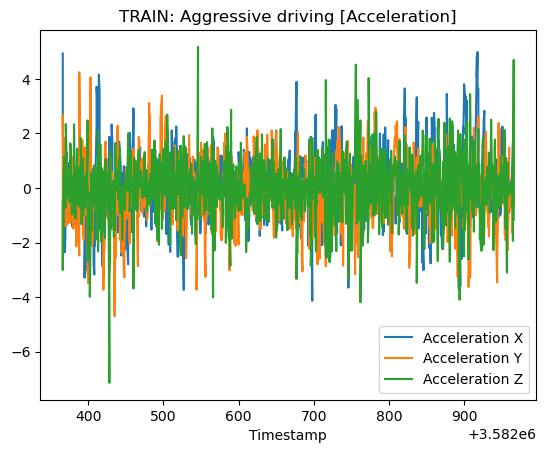

In [14]:
# Aggresive driving behavior's acceleration
import matplotlib.pyplot as plt

plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccX'], label='Acceleration X')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccY'], label='Acceleration Y')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccZ'], label='Acceleration Z')

plt.title('TRAIN: Aggressive driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

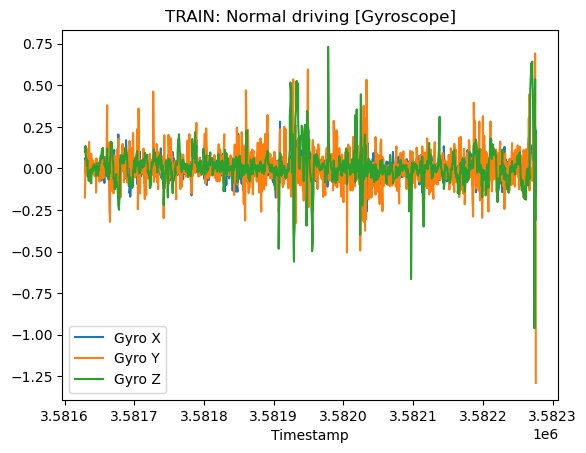

In [15]:
# Normal driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroX'], label='Gyro X')
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroY'], label='Gyro Y')
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroZ'], label='Gyro Z')

plt.title('TRAIN: Normal driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

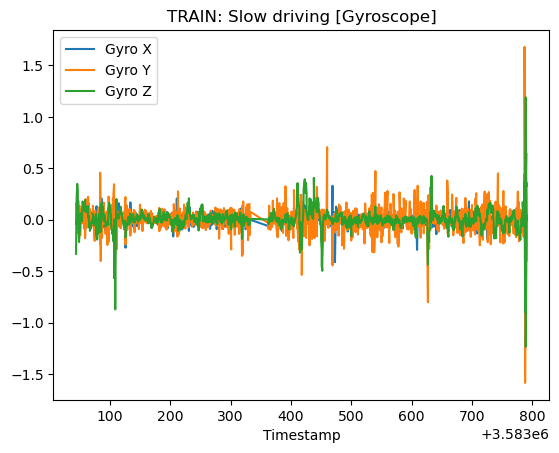

In [16]:
# Slow driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroX'], label='Gyro X')
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroY'], label='Gyro Y')
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroZ'], label='Gyro Z')

plt.title('TRAIN: Slow driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

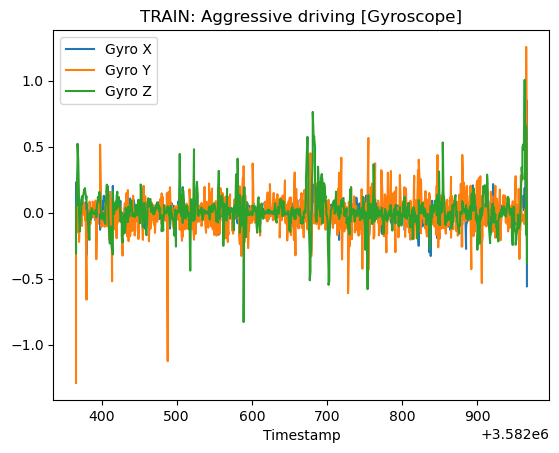

In [17]:
# Agressive driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroX'], label='Gyro X')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroY'], label='Gyro Y')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroZ'], label='Gyro Z')

plt.title('TRAIN: Aggressive driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

**TEST**

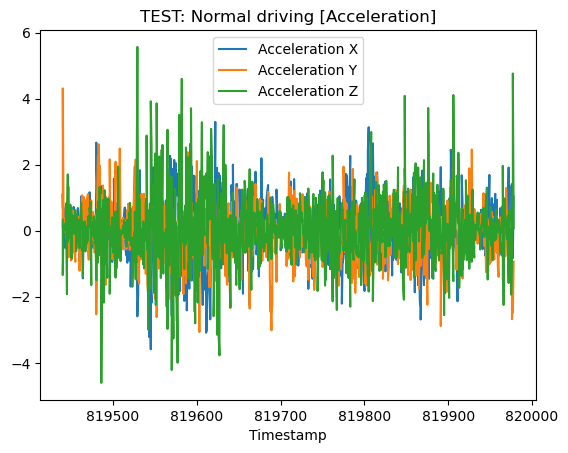

In [18]:
# Normal driving behavior's acceleration
import matplotlib.pyplot as plt

plt.plot(df_test_normal['Timestamp'], df_test_normal['AccX'], label='Acceleration X')
plt.plot(df_test_normal['Timestamp'], df_test_normal['AccY'], label='Acceleration Y')
plt.plot(df_test_normal['Timestamp'], df_test_normal['AccZ'], label='Acceleration Z')

plt.title('TEST: Normal driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

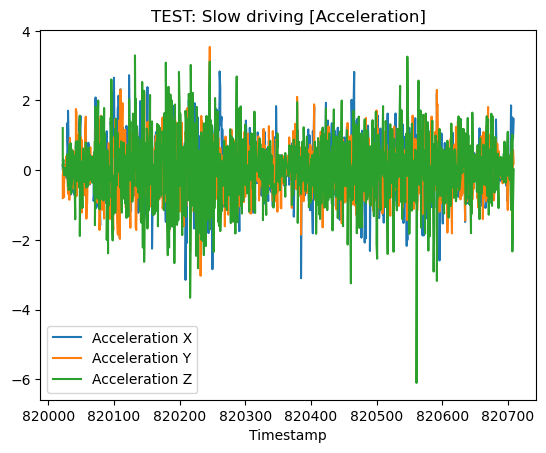

In [19]:
# Slow driving behavior's acceleration
import matplotlib.pyplot as plt

plt.plot(df_test_slow['Timestamp'], df_test_slow['AccX'], label='Acceleration X')
plt.plot(df_test_slow['Timestamp'], df_test_slow['AccY'], label='Acceleration Y')
plt.plot(df_test_slow['Timestamp'], df_test_slow['AccZ'], label='Acceleration Z')

plt.title('TEST: Slow driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

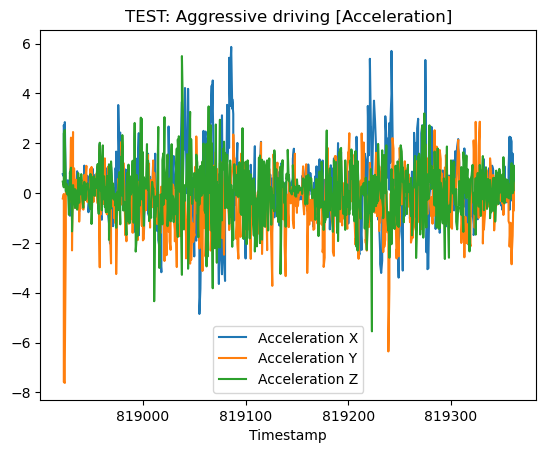

In [20]:
# Aggresive driving behavior's acceleration
import matplotlib.pyplot as plt

plt.plot(df_test_aggressive['Timestamp'], df_test_aggressive['AccX'], label='Acceleration X')
plt.plot(df_test_aggressive['Timestamp'], df_test_aggressive['AccY'], label='Acceleration Y')
plt.plot(df_test_aggressive['Timestamp'], df_test_aggressive['AccZ'], label='Acceleration Z')

plt.title('TEST: Aggressive driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

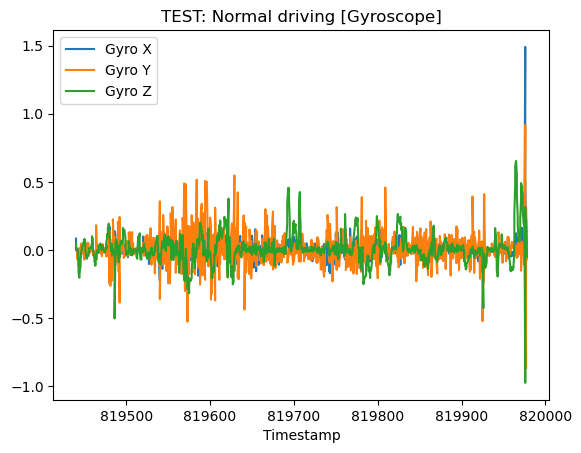

In [21]:
# Normal driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

plt.plot(df_test_normal['Timestamp'], df_test_normal['GyroX'], label='Gyro X')
plt.plot(df_test_normal['Timestamp'], df_test_normal['GyroY'], label='Gyro Y')
plt.plot(df_test_normal['Timestamp'], df_test_normal['GyroZ'], label='Gyro Z')

plt.title('TEST: Normal driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

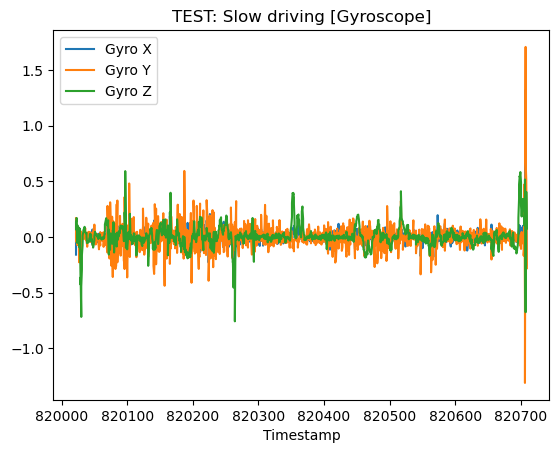

In [22]:
# Slow driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

plt.plot(df_test_slow['Timestamp'], df_test_slow['GyroX'], label='Gyro X')
plt.plot(df_test_slow['Timestamp'], df_test_slow['GyroY'], label='Gyro Y')
plt.plot(df_test_slow['Timestamp'], df_test_slow['GyroZ'], label='Gyro Z')

plt.title('TEST: Slow driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

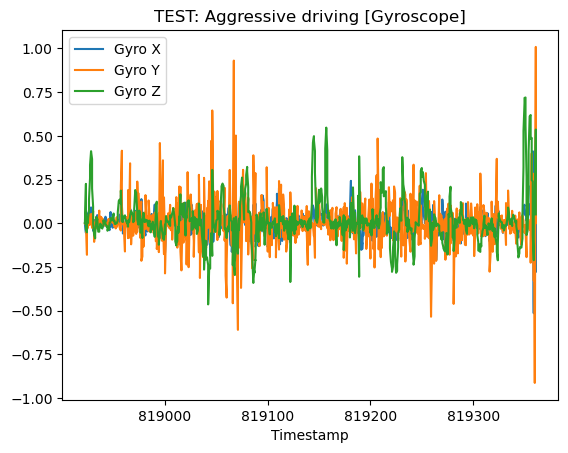

In [23]:
# Agressive driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

plt.plot(df_test_aggressive['Timestamp'], df_test_aggressive['GyroX'], label='Gyro X')
plt.plot(df_test_aggressive['Timestamp'], df_test_aggressive['GyroY'], label='Gyro Y')
plt.plot(df_test_aggressive['Timestamp'], df_test_aggressive['GyroZ'], label='Gyro Z')

plt.title('TEST: Aggressive driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

### Removing Noise From the Start and End of the DataSets

In [5]:
df_train_slow_new = df_train_slow.iloc[11:]
df_train_slow_new = df_train_slow.iloc[:-11]

df_test_slow_new = df_test_slow.iloc[11:]
df_test_slow_new = df_test_slow.iloc[:-11]

df_train_normal_new = df_train_normal.iloc[11:]
df_train_normal_new = df_train_normal.iloc[:-11]

df_test_normal_new = df_test_normal.iloc[11:]
df_test_normal_new = df_test_normal.iloc[:-11]

df_train_aggressive_new = df_train_aggressive.iloc[11:]
df_train_aggressive_new = df_train_aggressive.iloc[:-11]

df_test_aggressive_new = df_test_aggressive.iloc[11:]
df_test_aggressive_new = df_test_aggressive.iloc[:-11]

### Merging the DataSets

In [6]:
# Normal Merge
df_merged_normal = pd.concat([df_train_normal_new, df_test_normal_new])

# Changing Timestamp to start from 0
df_merged_normal.drop('Timestamp', axis=1, inplace=True)
n_rows = len(df_merged_normal.index)  # get the number of rows in your DataFrame
df_merged_normal['Timestamp'] = [i//2 for i in range(n_rows)]

# Slow Merge
df_merged_slow = pd.concat([df_train_slow_new, df_test_slow_new])

# Changing Timestamp to start from 0
df_merged_slow.drop('Timestamp', axis=1, inplace=True)
n_rows = len(df_merged_slow.index)  # get the number of rows in your DataFrame
df_merged_slow['Timestamp'] = [i//2 for i in range(n_rows)]

# Aggressive Merge
df_merged_aggressive = pd.concat([df_train_aggressive_new, df_test_aggressive_new])

# Changing Timestamp to start from 0
df_merged_aggressive.drop('Timestamp', axis=1, inplace=True)
n_rows = len(df_merged_aggressive.index)  # get the number of rows in your DataFrame
df_merged_aggressive['Timestamp'] = [i//2 for i in range(n_rows)]

### Merged Data Size

In [26]:
df_merged_data = pd.concat([df_merged_slow, df_merged_normal, df_merged_aggressive])

In [117]:
df_merged_data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
2324,1.235752,-0.688191,-0.474099,-0.016341,0.060476,-0.094150,SLOW,0
2325,0.850844,-0.395064,-0.361150,-0.036499,-0.152716,-0.100869,SLOW,0
2326,-0.433729,-1.212511,0.104845,-0.010232,0.048869,0.030467,SLOW,1
2327,0.924771,-0.333970,0.810514,0.061239,0.037263,0.062232,SLOW,1
2328,-0.102913,-0.378621,0.942614,-0.015119,-0.009774,0.006643,SLOW,2
...,...,...,...,...,...,...,...,...
798,0.051127,-0.030716,0.574101,-0.005498,0.025885,-0.044135,AGGRESSIVE,939
799,0.056169,0.162127,-0.167583,0.064141,-0.024206,0.199600,AGGRESSIVE,939
800,-0.373742,-0.103553,-0.093754,0.048869,-0.020540,0.412181,AGGRESSIVE,940
801,-0.348425,-0.349515,0.526798,0.092852,-0.033369,0.605215,AGGRESSIVE,940


### Merged Sample Size Based on Class

In [28]:
# Check train data per label
merged_slow_samples = df_merged_slow.__len__()
merged_normal_samples = df_merged_normal.__len__()
merged_aggressive_samples = df_merged_aggressive.__len__()


print('---Merged Samples---')
print('Normal: ' + str(merged_normal_samples))
print('Slow: ' + str(merged_slow_samples))
print('Aggressive: ' + str(merged_aggressive_samples))

---Merged Samples---
Normal: 2153
Slow: 2560
Aggressive: 1883


### All Analysis in One

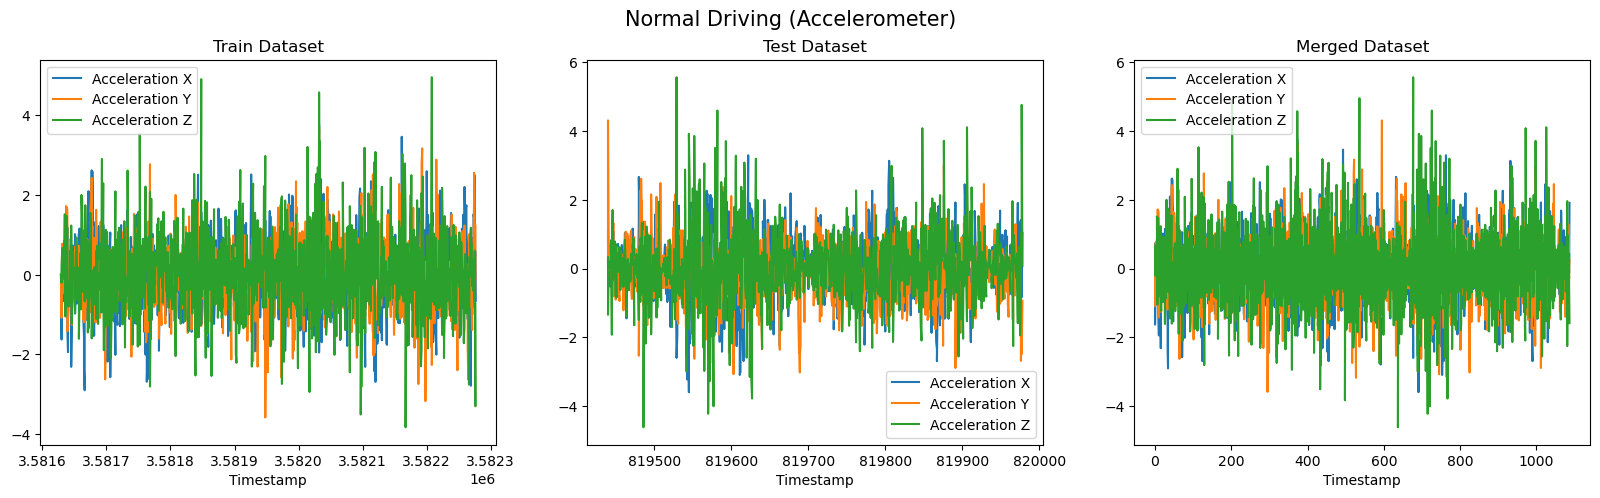

In [204]:
# Normal driving behavior's acceleration
import matplotlib.pyplot as plt

# define figure and axes
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# plot for df_train_normal
axs[0].set_title("Train Dataset")
axs[0].plot(df_train_normal['Timestamp'], df_train_normal['AccX'], label='Acceleration X')
axs[0].plot(df_train_normal['Timestamp'], df_train_normal['AccY'], label='Acceleration Y')
axs[0].plot(df_train_normal['Timestamp'], df_train_normal['AccZ'], label='Acceleration Z')
axs[0].set_xlabel('Timestamp')
axs[0].legend()

# plot for df_test_normal
axs[1].set_title("Test Dataset")
axs[1].plot(df_test_normal['Timestamp'], df_test_normal['AccX'], label='Acceleration X')
axs[1].plot(df_test_normal['Timestamp'], df_test_normal['AccY'], label='Acceleration Y')
axs[1].plot(df_test_normal['Timestamp'], df_test_normal['AccZ'], label='Acceleration Z')
axs[1].set_xlabel('Timestamp')
axs[1].legend()

# plot for df_merged_normal
axs[2].set_title("Merged Dataset")
axs[2].plot(df_merged_normal['Timestamp'], df_merged_normal['AccX'], label='Acceleration X')
axs[2].plot(df_merged_normal['Timestamp'], df_merged_normal['AccY'], label='Acceleration Y')
axs[2].plot(df_merged_normal['Timestamp'], df_merged_normal['AccZ'], label='Acceleration Z')
axs[2].set_xlabel('Timestamp')
axs[2].legend()

fig.suptitle('Normal Driving (Accelerometer)', fontsize=15)

# show the plot
plt.show()


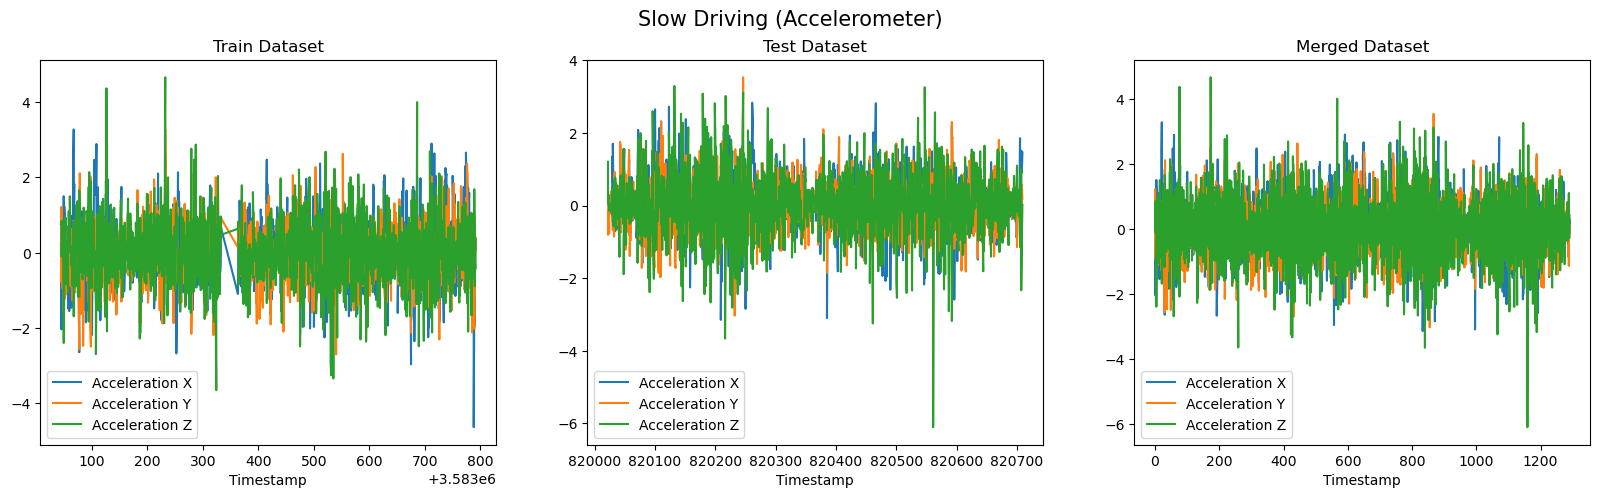

In [205]:
# Slow driving behavior's acceleration
import matplotlib.pyplot as plt

# define figure and axes
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# plot for df_train_slow
axs[0].set_title("Train Dataset")
axs[0].plot(df_train_slow['Timestamp'], df_train_slow['AccX'], label='Acceleration X')
axs[0].plot(df_train_slow['Timestamp'], df_train_slow['AccY'], label='Acceleration Y')
axs[0].plot(df_train_slow['Timestamp'], df_train_slow['AccZ'], label='Acceleration Z')
axs[0].set_xlabel('Timestamp')
axs[0].legend()

# plot for df_test_slow
axs[1].set_title("Test Dataset")
axs[1].plot(df_test_slow['Timestamp'], df_test_slow['AccX'], label='Acceleration X')
axs[1].plot(df_test_slow['Timestamp'], df_test_slow['AccY'], label='Acceleration Y')
axs[1].plot(df_test_slow['Timestamp'], df_test_slow['AccZ'], label='Acceleration Z')
axs[1].set_xlabel('Timestamp')
axs[1].legend()

# plot for df_merged_slow
axs[2].set_title("Merged Dataset")
axs[2].plot(df_merged_slow['Timestamp'], df_merged_slow['AccX'], label='Acceleration X')
axs[2].plot(df_merged_slow['Timestamp'], df_merged_slow['AccY'], label='Acceleration Y')
axs[2].plot(df_merged_slow['Timestamp'], df_merged_slow['AccZ'], label='Acceleration Z')
axs[2].set_xlabel('Timestamp')
axs[2].legend()

fig.suptitle('Slow Driving (Accelerometer)', fontsize=15)

# show the plot
plt.show()

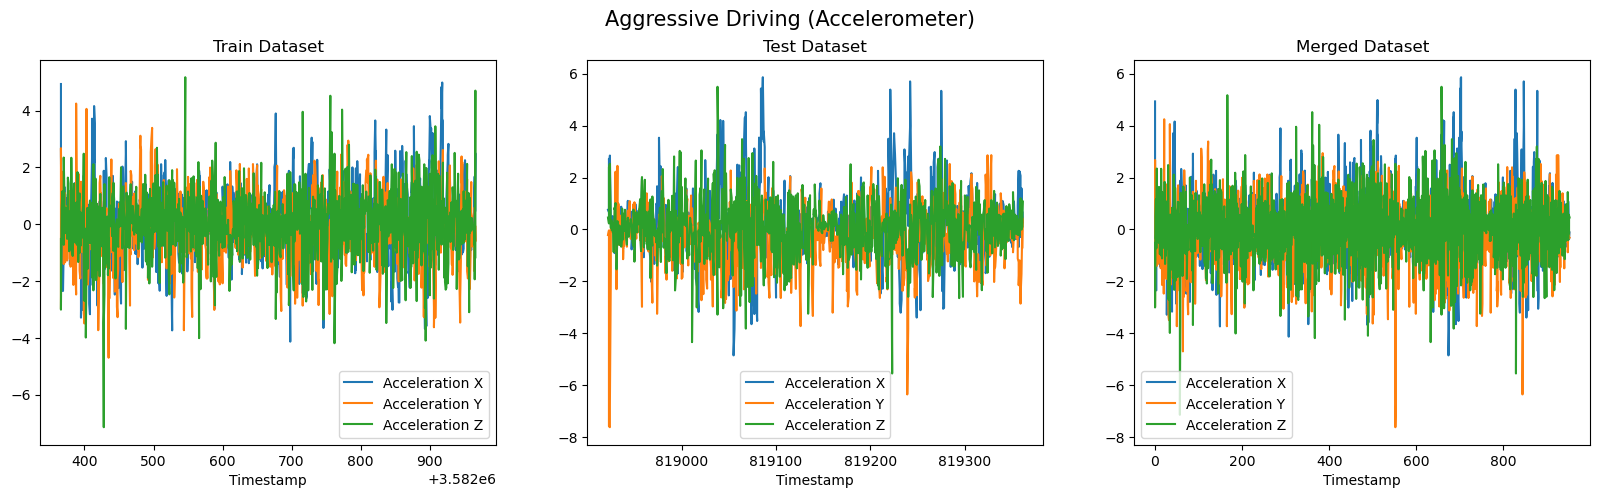

In [206]:
# Aggressive driving behavior's acceleration
import matplotlib.pyplot as plt

# define figure and axes
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# plot for df_train_aggressive
axs[0].set_title("Train Dataset")
axs[0].plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccX'], label='Acceleration X')
axs[0].plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccY'], label='Acceleration Y')
axs[0].plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccZ'], label='Acceleration Z')
axs[0].set_xlabel('Timestamp')
axs[0].legend()

# plot for df_test_aggressive
axs[1].set_title("Test Dataset")
axs[1].plot(df_test_aggressive['Timestamp'], df_test_aggressive['AccX'], label='Acceleration X')
axs[1].plot(df_test_aggressive['Timestamp'], df_test_aggressive['AccY'], label='Acceleration Y')
axs[1].plot(df_test_aggressive['Timestamp'], df_test_aggressive['AccZ'], label='Acceleration Z')
axs[1].set_xlabel('Timestamp')
axs[1].legend()

# plot for df_merged_aggressive
axs[2].set_title("Merged Dataset")
axs[2].plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['AccX'], label='Acceleration X')
axs[2].plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['AccY'], label='Acceleration Y')
axs[2].plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['AccZ'], label='Acceleration Z')
axs[2].set_xlabel('Timestamp')
axs[2].legend()

fig.suptitle('Aggressive Driving (Accelerometer)', fontsize=15)

# show the plot
plt.show()

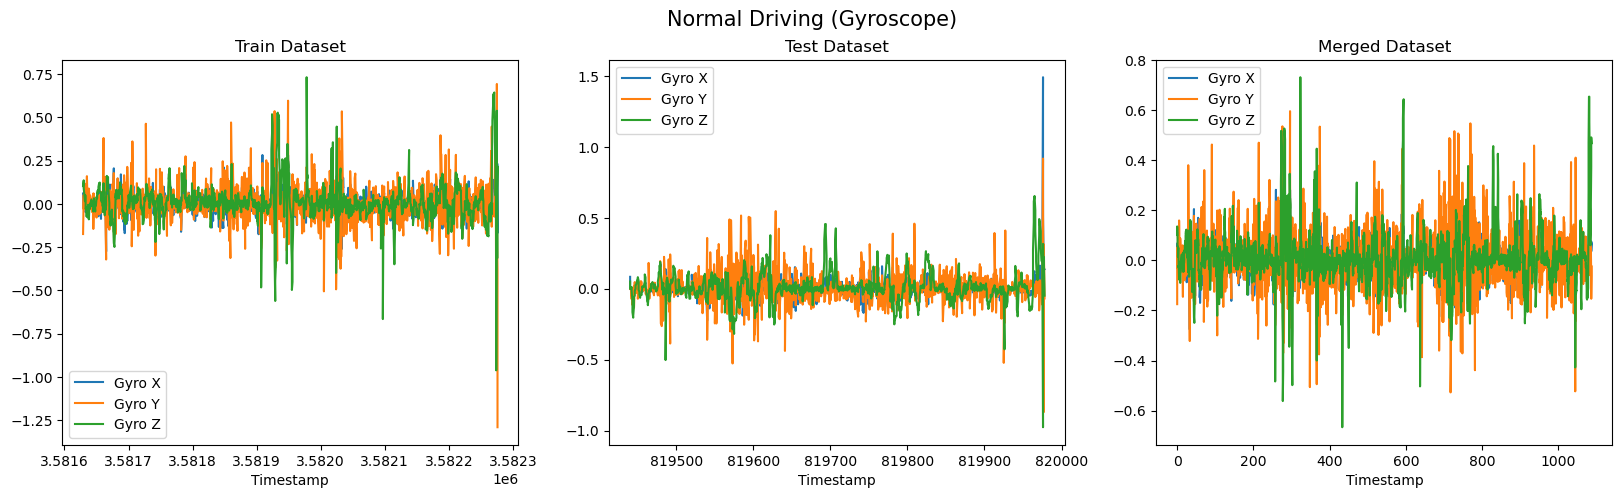

In [207]:
# Normal driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

# define figure and axes
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# plot for df_train_normal
axs[0].set_title("Train Dataset")
axs[0].plot(df_train_normal['Timestamp'], df_train_normal['GyroX'], label='Gyro X')
axs[0].plot(df_train_normal['Timestamp'], df_train_normal['GyroY'], label='Gyro Y')
axs[0].plot(df_train_normal['Timestamp'], df_train_normal['GyroZ'], label='Gyro Z')
axs[0].set_xlabel('Timestamp')
axs[0].legend()

# plot for df_test_normal
axs[1].set_title("Test Dataset")
axs[1].plot(df_test_normal['Timestamp'], df_test_normal['GyroX'], label='Gyro X')
axs[1].plot(df_test_normal['Timestamp'], df_test_normal['GyroY'], label='Gyro Y')
axs[1].plot(df_test_normal['Timestamp'], df_test_normal['GyroZ'], label='Gyro Z')
axs[1].set_xlabel('Timestamp')
axs[1].legend()

# plot for df_merged_normal
axs[2].set_title("Merged Dataset")
axs[2].plot(df_merged_normal['Timestamp'], df_merged_normal['GyroX'], label='Gyro X')
axs[2].plot(df_merged_normal['Timestamp'], df_merged_normal['GyroY'], label='Gyro Y')
axs[2].plot(df_merged_normal['Timestamp'], df_merged_normal['GyroZ'], label='Gyro Z')
axs[2].set_xlabel('Timestamp')
axs[2].legend()

fig.suptitle('Normal Driving (Gyroscope)', fontsize=15)

# show the plot
plt.show()

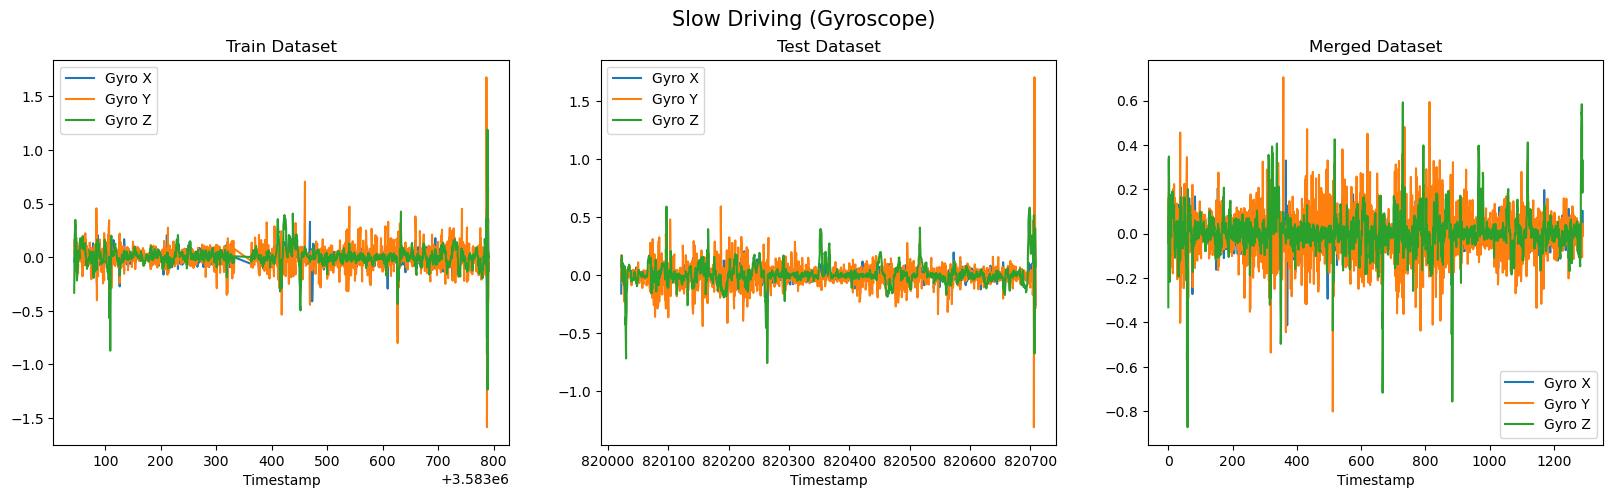

In [208]:
# Slow driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

# define figure and axes
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# plot for df_train_slow
axs[0].set_title("Train Dataset")
axs[0].plot(df_train_slow['Timestamp'], df_train_slow['GyroX'], label='Gyro X')
axs[0].plot(df_train_slow['Timestamp'], df_train_slow['GyroY'], label='Gyro Y')
axs[0].plot(df_train_slow['Timestamp'], df_train_slow['GyroZ'], label='Gyro Z')
axs[0].set_xlabel('Timestamp')
axs[0].legend()

# plot for df_test_slow
axs[1].set_title("Test Dataset")
axs[1].plot(df_test_slow['Timestamp'], df_test_slow['GyroX'], label='Gyro X')
axs[1].plot(df_test_slow['Timestamp'], df_test_slow['GyroY'], label='Gyro Y')
axs[1].plot(df_test_slow['Timestamp'], df_test_slow['GyroZ'], label='Gyro Z')
axs[1].set_xlabel('Timestamp')
axs[1].legend()

# plot for df_merged_slow
axs[2].set_title("Merged Dataset")
axs[2].plot(df_merged_slow['Timestamp'], df_merged_slow['GyroX'], label='Gyro X')
axs[2].plot(df_merged_slow['Timestamp'], df_merged_slow['GyroY'], label='Gyro Y')
axs[2].plot(df_merged_slow['Timestamp'], df_merged_slow['GyroZ'], label='Gyro Z')
axs[2].set_xlabel('Timestamp')
axs[2].legend()

fig.suptitle('Slow Driving (Gyroscope)', fontsize=15)

# show the plot
plt.show()

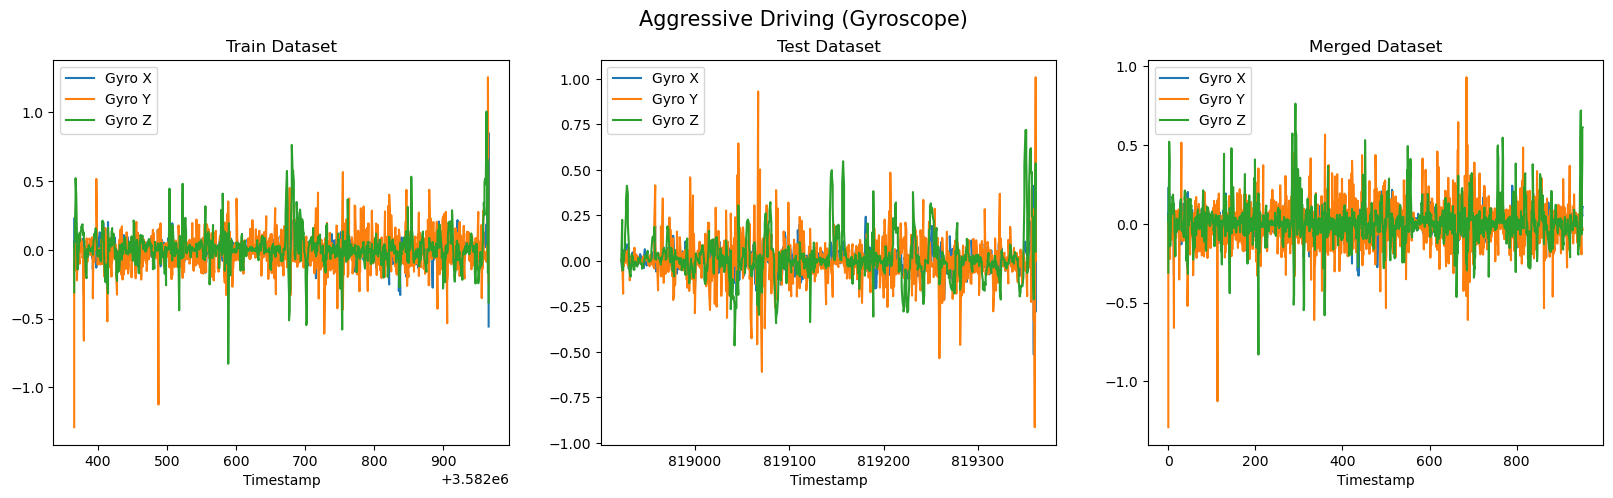

In [209]:
# Aggressive driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

# define figure and axes
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# plot for df_train_aggressive
axs[0].set_title("Train Dataset")
axs[0].plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroX'], label='Gyro X')
axs[0].plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroY'], label='Gyro Y')
axs[0].plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroZ'], label='Gyro Z')
axs[0].set_xlabel('Timestamp')
axs[0].legend()

# plot for df_test_aggressive
axs[1].set_title("Test Dataset")
axs[1].plot(df_test_aggressive['Timestamp'], df_test_aggressive['GyroX'], label='Gyro X')
axs[1].plot(df_test_aggressive['Timestamp'], df_test_aggressive['GyroY'], label='Gyro Y')
axs[1].plot(df_test_aggressive['Timestamp'], df_test_aggressive['GyroZ'], label='Gyro Z')
axs[1].set_xlabel('Timestamp')
axs[1].legend()

# plot for df_merged_aggressive
axs[2].set_title("Merged Dataset")
axs[2].plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['GyroX'], label='Gyro X')
axs[2].plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['GyroY'], label='Gyro Y')
axs[2].plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['GyroZ'], label='Gyro Z')
axs[2].set_xlabel('Timestamp')
axs[2].legend()

fig.suptitle('Aggressive Driving (Gyroscope)', fontsize=15)

# show the plot
plt.show()

### Comparing Sensor Values of Merged DataSet

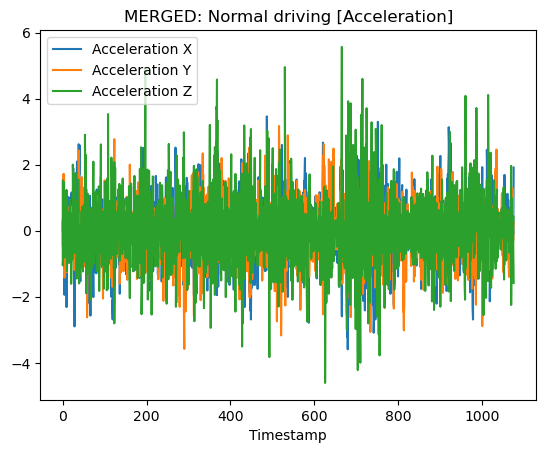

In [29]:
# Normal driving behavior's acceleration
import matplotlib.pyplot as plt

plt.plot(df_merged_normal['Timestamp'], df_merged_normal['AccX'], label='Acceleration X')
plt.plot(df_merged_normal['Timestamp'], df_merged_normal['AccY'], label='Acceleration Y')
plt.plot(df_merged_normal['Timestamp'], df_merged_normal['AccZ'], label='Acceleration Z')

plt.title('MERGED: Normal driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

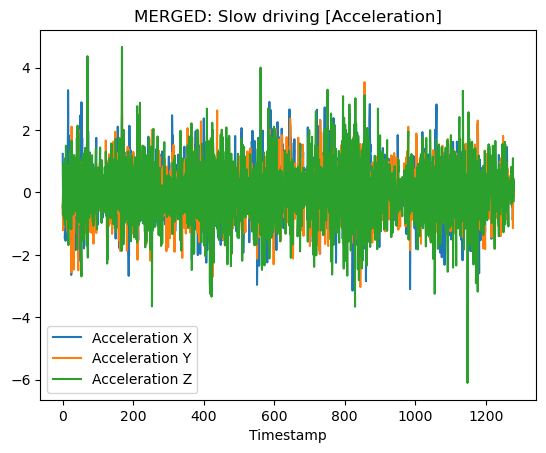

In [30]:
# Slow driving behavior's acceleration
import matplotlib.pyplot as plt

plt.plot(df_merged_slow['Timestamp'], df_merged_slow['AccX'], label='Acceleration X')
plt.plot(df_merged_slow['Timestamp'], df_merged_slow['AccY'], label='Acceleration Y')
plt.plot(df_merged_slow['Timestamp'], df_merged_slow['AccZ'], label='Acceleration Z')

plt.title('MERGED: Slow driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

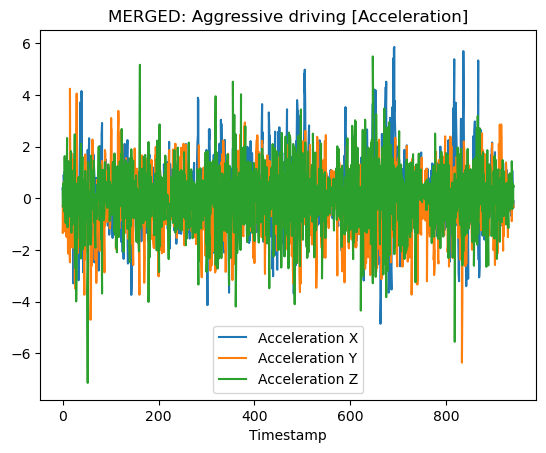

In [31]:
# Aggressive driving behavior's acceleration
import matplotlib.pyplot as plt

plt.plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['AccX'], label='Acceleration X')
plt.plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['AccY'], label='Acceleration Y')
plt.plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['AccZ'], label='Acceleration Z')

plt.title('MERGED: Aggressive driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

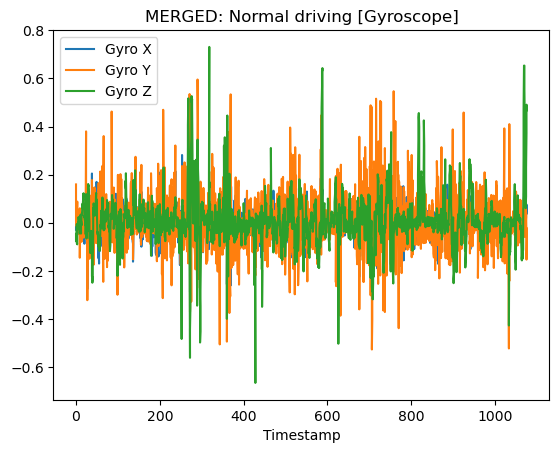

In [32]:
# Normal driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

plt.plot(df_merged_normal['Timestamp'], df_merged_normal['GyroX'], label='Gyro X')
plt.plot(df_merged_normal['Timestamp'], df_merged_normal['GyroY'], label='Gyro Y')
plt.plot(df_merged_normal['Timestamp'], df_merged_normal['GyroZ'], label='Gyro Z')

plt.title('MERGED: Normal driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

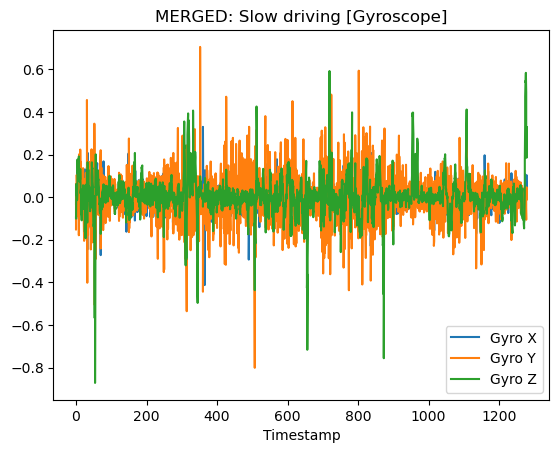

In [33]:
# Slow driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

plt.plot(df_merged_slow['Timestamp'], df_merged_slow['GyroX'], label='Gyro X')
plt.plot(df_merged_slow['Timestamp'], df_merged_slow['GyroY'], label='Gyro Y')
plt.plot(df_merged_slow['Timestamp'], df_merged_slow['GyroZ'], label='Gyro Z')

plt.title('MERGED: Slow driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

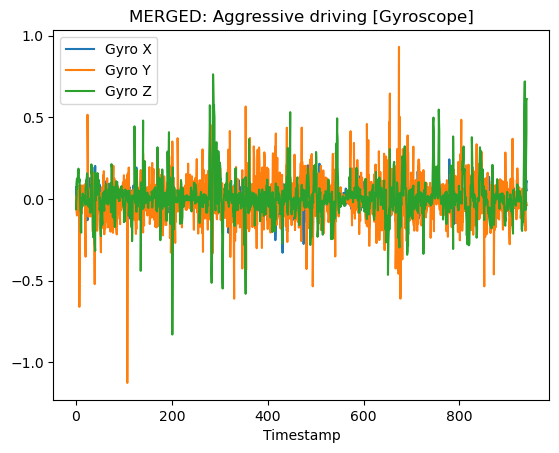

In [34]:
# Aggressive driving behavior's gyroscope orientation
import matplotlib.pyplot as plt

plt.plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['GyroX'], label='Gyro X')
plt.plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['GyroY'], label='Gyro Y')
plt.plot(df_merged_aggressive['Timestamp'], df_merged_aggressive['GyroZ'], label='Gyro Z')

plt.title('MERGED: Aggressive driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

### Seperating Features from Labels

In [7]:
# Separating features from labels

# Features
X_merged_normal = df_merged_normal.iloc[: , :6]
X_merged_slow = df_merged_slow.iloc[: , :6]
X_merged_aggressive = df_merged_aggressive.iloc[: , :6]

# Labels
y_merged_normal = df_merged_normal.Class
y_merged_slow = df_merged_slow.Class
y_merged_aggressive = df_merged_aggressive.Class

### Combining all samples into Train DataSet

In [8]:
# Combine all the samples into a train dataset
X = pd.concat([X_merged_slow, X_merged_normal, X_merged_aggressive])
y = pd.concat([y_merged_slow, y_merged_normal, y_merged_aggressive])

In [11]:
X

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
2313,0.268914,-0.761465,0.762380,-0.041386,0.158825,-0.331776
2314,-2.038684,1.218967,0.840069,0.028253,0.028100,0.115377
2315,-0.034550,-0.109122,-0.105034,0.059407,0.006109,0.196622
2316,-0.322625,-0.346236,0.274647,0.080176,-0.013439,0.335900
2317,0.344335,-0.129027,0.524487,0.045968,-0.039706,0.348117
...,...,...,...,...,...,...
798,0.051127,-0.030716,0.574101,-0.005498,0.025885,-0.044135
799,0.056169,0.162127,-0.167583,0.064141,-0.024206,0.199600
800,-0.373742,-0.103553,-0.093754,0.048869,-0.020540,0.412181
801,-0.348425,-0.349515,0.526798,0.092852,-0.033369,0.605215


In [38]:
X.shape

(6596, 6)

In [10]:
y

2313          SLOW
2314          SLOW
2315          SLOW
2316          SLOW
2317          SLOW
           ...    
798     AGGRESSIVE
799     AGGRESSIVE
800     AGGRESSIVE
801     AGGRESSIVE
802     AGGRESSIVE
Name: Class, Length: 6662, dtype: object

In [41]:
y.shape

(6596,)

### Converting Labels into Numbers

In [13]:
# As ML/DL algorithms are working with numbers
# the labels should be mapped to numbers
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

In [14]:
y

array([2, 2, 2, ..., 0, 0, 0])

### Scaling the Features

In [15]:
# As the dataset contains variables that are different in scale,
# a good solution will be to standardize it
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [16]:
X

array([[ 0.20635878, -0.73757345,  0.7455814 , -0.77045312,  1.44690725,
        -3.21290274],
       [-2.15775258,  1.45896898,  0.82414518,  0.49218205,  0.2583437 ,
         1.01167139],
       [-0.10453736, -0.01404456, -0.13159746,  1.05704516,  0.05839844,
         1.77925117],
       ...,
       [-0.45203629, -0.00786795, -0.12019041,  0.86598852, -0.18389633,
         3.8157903 ],
       [-0.42609933, -0.28067059,  0.50734783,  1.66344235, -0.30053106,
         5.63951328],
       [-0.1876661 , -0.25020404,  0.43676453,  1.92926017, -0.33940933,
         5.6972265 ]])

### Train Test Split

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
print('X_train Sample Size: ' + str(X_train.shape))
print('X_test Sample Size: ' + str(X_test.shape))
print('y_train Sample Size: ' + str(y_train.shape))
print('y_test Sample Size: ' + str(y_test.shape))

X_train Sample Size: (4419, 6)
X_test Sample Size: (2177, 6)
y_train Sample Size: (4419,)
y_test Sample Size: (2177,)


In [67]:
print('X_train:', X_train)
print('y_train:', y_train)

X_train: [[ 0.10788154  0.33296742 -1.17764632  0.52687282  1.21148062 -0.14601732]
 [-0.60239956  0.83655403  1.11753641 -0.02458311 -0.07280279 -0.2034527 ]
 [-2.02861382  0.3896658  -0.34492289  0.62663372  0.69076842  0.48795297]
 ...
 [ 0.08566637 -0.11267243 -0.83392581  0.38554493  0.80064989 -0.2034527 ]
 [ 2.25785056 -1.55148537  0.38606826 -0.00241403 -1.37738275 -0.30814505]
 [-0.09199692 -0.06106674  1.16549034  0.36337587 -0.35275557 -0.23253392]]
y_train: [1 2 0 ... 0 0 2]


### Training

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print("Logistic Regression Train score:", lr_train_score)
print("Logistic Regression Test score:", lr_test_score)

# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)
print("Decision Tree Train score:", dt_train_score)
print("Decision Tree Test score:", dt_test_score)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print("Random Forest Train score:", rf_train_score)
print("Random Forest Test score:", rf_test_score)

# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
svm_train_score = svm.score(X_train, y_train)
svm_test_score = svm.score(X_test, y_test)
print("SVM Train score:", svm_train_score)
print("SVM Test score:", svm_test_score)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)
print("KNN Train score:", knn_train_score)
print("KNN Test score:", knn_test_score)

# Gradient Boosting Machines
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbm_train_score = gbm.score(X_train, y_train)
gbm_test_score = gbm.score(X_test, y_test)
print("GBM Train score:", gbm_train_score)
print("GBM Test score:", gbm_test_score)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_train_score = gnb.score(X_train, y_train)
gnb_test_score = gnb.score(X_test, y_test)
print("Gaussian Naive Bayes Train score:", gnb_train_score)
print("Gaussian Naive Bayes Test score:", gnb_test_score)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_train_score = bnb.score(X_train, y_train)
bnb_test_score = bnb.score(X_test, y_test)
print("Bernoulli Naive Bayes Train score:", bnb_train_score)
print("Bernoulli Naive Bayes Test score:", bnb_test_score)

Logistic Regression Train score: 0.4295089386739081
Logistic Regression Test score: 0.43867707854846116
Decision Tree Train score: 1.0
Decision Tree Test score: 0.39503904455672945
Random Forest Train score: 1.0
Random Forest Test score: 0.4115755627009646
SVM Train score: 0.5109753337859244
SVM Test score: 0.43913642627468996
KNN Train score: 0.5779588142113601
KNN Test score: 0.3729903536977492
GBM Train score: 0.589499886852229
GBM Test score: 0.4230592558566835
Gaussian Naive Bayes Train score: 0.4444444444444444
Gaussian Naive Bayes Test score: 0.4340836012861736
Bernoulli Naive Bayes Train score: 0.37949762389680924
Bernoulli Naive Bayes Test score: 0.39412034910427196


### Tuning

In [102]:
# Random Forest with Grid Search
rf_params = {'n_estimators': [50, 100, 200],
             'max_depth': [3, 5, 10, None], 
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_gs.fit(X_train, y_train)
rf_gs_train_score = rf_gs.score(X_train, y_train)
rf_gs_test_score = rf_gs.score(X_test, y_test)
print("Random Forest Train score after tuning:", rf_gs_train_score)
print("Random Forest Test score after tuning:", rf_gs_test_score)
print("Best parameters for Random Forest:", rf_gs.best_params_)

Random Forest Train score after tuning: 0.6641774157049106
Random Forest Test score after tuning: 0.4336242535599449
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [86]:
# Decision Trees with Grid Search
dt_params = {'max_depth': [3, 5, 10, None], 
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_gs.fit(X_train, y_train)
dt_gs_train_score = dt_gs.score(X_train, y_train)
dt_gs_test_score = dt_gs.score(X_test, y_test)
print("Decision Tree Train score after tuning:", dt_gs_train_score)
print("Decision Tree Test score after tuning:", dt_gs_test_score)
print("Best parameters for Decision Trees:", dt_gs.best_params_)

Decision Tree Train score after tuning: 0.4636795655125594
Decision Tree Test score after tuning: 0.423977951309141
Best parameters for Decision Trees: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [88]:
# Support Vector Machines with Grid Search
svm_params = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'rbf', 'poly']}
svm_gs = GridSearchCV(SVC(), svm_params, cv=5)
svm_gs.fit(X_train, y_train)
svm_gs_train_score = svm_gs.score(X_train, y_train)
svm_gs_test_score = svm_gs.score(X_test, y_test)
print("SVM Train score after tuning:", svm_gs_train_score)
print("SVM Test score after tuning:", svm_gs_test_score)
print("Best parameters for SVM:", svm_gs.best_params_)

SVM Train score after tuning: 0.5109753337859244
SVM Test score after tuning: 0.43913642627468996
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}


In [89]:
# Gradient Boosting Machines with Grid Search
gbm_params = {'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 10]}
gbm_gs = GridSearchCV(GradientBoostingClassifier(), gbm_params, cv=5)
gbm_gs.fit(X_train, y_train)
gbm_gs_train_score = gbm_gs.score(X_train, y_train)
gbm_gs_test_score = gbm_gs.score(X_test, y_test)
print("GBM score Train after tuning:", gbm_gs_train_score)
print("GBM score Test after tuning:", gbm_gs_test_score)
print("Best parameters for GBM:", gbm_gs.best_params_)

GBM score Train after tuning: 0.5399411631590858
GBM score Test after tuning: 0.4225999081304547
Best parameters for GBM: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [98]:
# K-Nearest Neighbors with Grid Search
knn_params = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_gs.fit(X_train, y_train)
knn_gs_train_score = knn_gs.score(X_train, y_train)
knn_gs_test_score = knn_gs.score(X_test, y_test)
print("KNN Train score after tuning:", knn_gs_train_score)
print("KNN Test score after tuning:", knn_gs_test_score)
print("Best parameters for KNN:", knn_gs.best_params_)

KNN Train score after tuning: 1.0
KNN Test score after tuning: 0.39917317409278824
Best parameters for KNN: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}


In [99]:
# Gaussian Naive Bayes with Grid Search
gnb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
gnb_gs = GridSearchCV(GaussianNB(), gnb_params, cv=5)
gnb_gs.fit(X_train, y_train)
gnb_gs_train_score = gnb_gs.score(X_train, y_train)
gnb_gs_test_score = gnb_gs.score(X_test, y_test)
print("GaussianNB Train score after tuning:", gnb_gs_train_score)
print("GaussianNB Test score after tuning:", gnb_gs_test_score)
print("Best parameters for GaussianNB:", gnb_gs.best_params_)

GaussianNB Train score after tuning: 0.4444444444444444
GaussianNB Test score after tuning: 0.4340836012861736
Best parameters for GaussianNB: {'var_smoothing': 1e-09}


In [100]:
# Bernoulli Naive Bayes with Grid Search
bnb_params = {'alpha': [0, 0.1, 0.5, 1, 2]}
bnb_gs = GridSearchCV(BernoulliNB(), bnb_params, cv=5)
bnb_gs.fit(X_train, y_train)
bnb_gs_train_score = bnb_gs.score(X_train, y_train)
bnb_gs_test_score = bnb_gs.score(X_test, y_test)
print("BernoulliNB Train score after tuning:", bnb_gs_train_score)
print("BernoulliNB Test score after tuning:", bnb_gs_test_score)
print("Best parameters for BernoulliNB:", bnb_gs.best_params_)

BernoulliNB Train score after tuning: 0.37949762389680924
BernoulliNB Test score after tuning: 0.39412034910427196
Best parameters for BernoulliNB: {'alpha': 0}


c:\Users\hamza\anaconda3\envs\codanics\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hamza\anaconda3\envs\codanics\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hamza\anaconda3\envs\codanics\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hamza\anaconda3\envs\codanics\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hamza\anaconda3\envs\codanics\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hamza\anaconda3\envs\codanics\lib\site-packages\sklearn\naive

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Logistic Regression
lr_y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred, average='weighted')
lr_recall = recall_score(y_test, lr_y_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')
lr_cm = confusion_matrix(y_test, lr_y_pred)

print("Logistic Regression Accuracy:", lr_acc)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1 Score:", lr_f1)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)

# K-Nearest Neighbors
knn_y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
knn_cm = confusion_matrix(y_test, knn_y_pred)

print("K-Nearest Neighbors Accuracy:", knn_acc)
print("K-Nearest Neighbors Precision:", knn_precision)
print("K-Nearest Neighbors Recall:", knn_recall)
print("K-Nearest Neighbors F1 Score:", knn_f1)
print("K-Nearest Neighbors Confusion Matrix:")
print(knn_cm)

# Decision Trees after tuning
dt_y_pred = dt_gs.predict(X_test)
dt_acc = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')
dt_cm = confusion_matrix(y_test, dt_y_pred)

print("Decision Trees Accuracy:", dt_acc)
print("Decision Trees Precision:", dt_precision)
print("Decision Trees Recall:", dt_recall)
print("Decision Trees F1 Score:", dt_f1)
print("Decision Trees Confusion Matrix:")
print(dt_cm)

# Random Forest after tuning
rf_y_pred = rf_gs.predict(X_test)
rf_acc = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_cm = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Confusion Matrix:")
print(rf_cm)

# SVM after tuning
svm_y_pred = svm_gs.predict(X_test)
svm_acc = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')
svm_cm = confusion_matrix(y_test, svm_y_pred)

print("SVM Accuracy:", svm_acc)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)
print("SVM Confusion Matrix:")
print(svm_cm)

# Gradient Boosting Machines after tuning
gbm_y_pred = gbm_gs.predict(X_test)
gbm_acc = accuracy_score(y_test, gbm_y_pred)
gbm_precision = precision_score(y_test, gbm_y_pred, average='weighted')
gbm_recall = recall_score(y_test, gbm_y_pred, average='weighted')
gbm_f1 = f1_score(y_test, gbm_y_pred, average='weighted')
gbm_cm = confusion_matrix(y_test, gbm_y_pred)

print("Gradient Boosting Machines Accuracy:", gbm_acc)
print("Gradient Boosting Machines Precision:", gbm_precision)
print("Gradient Boosting Machines Recall:", gbm_recall)
print("Gradient Boosting Machines F1 Score:", gbm_f1)
print("Gradient Boosting Machines Confusion Matrix:")
print(gbm_cm)

# Gaussian Naive Bayes after tuning
gnb_y_pred = gnb_gs.predict(X_test)
gnb_acc = accuracy_score(y_test, gnb_y_pred)
gnb_precision = precision_score(y_test, gnb_y_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_y_pred, average='weighted')
gnb_f1 = f1_score(y_test, gnb_y_pred, average='weighted')
gnb_cm = confusion_matrix(y_test, gnb_y_pred)

print("Gaussian Naive Bayes Accuracy:", gnb_acc)
print("Gaussian Naive Bayes Precision:", gnb_precision)
print("Gaussian Naive Bayes Recall:", gnb_recall)
print("Gaussian Naive Bayes F1 Score:", gnb_f1)
print("Gaussian Naive Bayes Confusion Matrix:")
print(gnb_cm)

# Bernoulli Naive Bayes after tuning
bnb_y_pred = bnb_gs.predict(X_test)
bnb_acc = accuracy_score(y_test, bnb_y_pred)
bnb_precision = precision_score(y_test, bnb_y_pred, average='weighted')
bnb_recall = recall_score(y_test, bnb_y_pred, average='weighted')
bnb_f1 = f1_score(y_test, bnb_y_pred, average='weighted')
bnb_cm = confusion_matrix(y_test, bnb_y_pred)

print("Bernoulli Naive Bayes Accuracy:", bnb_acc)
print("Bernoulli Naive Bayes Precision:", bnb_precision)
print("Bernoulli Naive Bayes Recall:", bnb_recall)
print("Bernoulli Naive Bayes F1 Score:", bnb_f1)
print("Bernoulli Naive Bayes Confusion Matrix:")
print(bnb_cm)

Logistic Regression Accuracy: 0.43867707854846116
Logistic Regression Precision: 0.451984777786032
Logistic Regression Recall: 0.43867707854846116
Logistic Regression F1 Score: 0.34062144343210815
Logistic Regression Confusion Matrix:
[[142  18 456]
 [ 71  23 606]
 [ 57  14 790]]
K-Nearest Neighbors Accuracy: 0.3729903536977492
K-Nearest Neighbors Precision: 0.3765141412065836
K-Nearest Neighbors Recall: 0.3729903536977492
K-Nearest Neighbors F1 Score: 0.3733897282939004
K-Nearest Neighbors Confusion Matrix:
[[258 182 176]
 [211 235 254]
 [244 298 319]]
Decision Trees Accuracy: 0.423977951309141
Decision Trees Precision: 0.40832078134180944
Decision Trees Recall: 0.423977951309141
Decision Trees F1 Score: 0.3762926475202675
Decision Trees Confusion Matrix:
[[180  81 355]
 [ 89  84 527]
 [100 102 659]]
Random Forest Accuracy: 0.4336242535599449
Random Forest Precision: 0.4202874747222985
Random Forest Recall: 0.4336242535599449
Random Forest F1 Score: 0.3892634086152719
Random Forest Co

c:\Users\hamza\anaconda3\envs\codanics\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


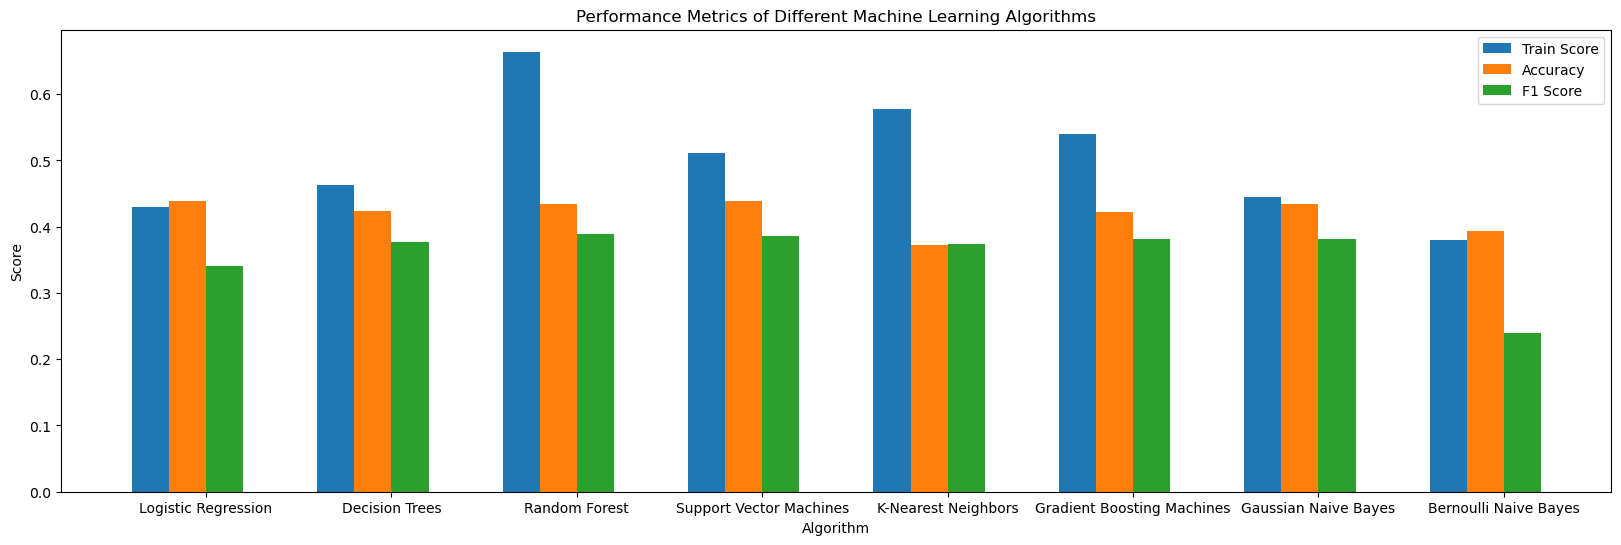

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Define the scores for each metric and algorithm
train_scores = [lr_train_score, dt_gs_train_score, rf_gs_train_score, svm_gs_train_score, knn_train_score, gbm_gs_train_score, gnb_gs_train_score, bnb_gs_train_score]
accuracy_scores = [lr_acc, dt_acc, rf_acc, svm_acc, knn_acc, gbm_acc, gnb_acc, bnb_acc]
precision_scores = [lr_precision, dt_precision, rf_precision, svm_precision, knn_precision, gbm_precision, gnb_precision, bnb_precision]
recall_scores = [lr_recall, dt_recall, rf_recall, svm_recall, knn_recall, gbm_recall, gnb_recall, bnb_recall]
f1_scores = [lr_f1, dt_f1, rf_f1, svm_f1, knn_f1, gbm_f1, gnb_f1, bnb_f1]

# Define the names of each algorithm
names = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Support Vector Machines', 'K-Nearest Neighbors', 'Gradient Boosting Machines', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes']

# Define the x-axis labels
metrics = ['Train Score', 'Accuracy', 'F1 Score']

# Set the width of each bar
width = 0.2

# Create a bar chart for each metric and algorithm
fig, ax = plt.subplots(figsize=(20, 6))
for i, metric in enumerate([train_scores, accuracy_scores, f1_scores]):
    x = np.arange(len(names))
    bars = ax.bar(x + i*width, metric, width, label=metrics[i])

# Add x-axis and y-axis labels
ax.set_ylabel('Score')
ax.set_xlabel('Algorithm')

# Add a title for the chart
ax.set_title('Performance Metrics of Different Machine Learning Algorithms')

# Add x-axis tick labels
ax.set_xticks(x + 1.5*width)
ax.set_xticklabels(names)

# Add a legend for the metrics
ax.legend()

# Show the chart
plt.show()
